## Generating Random Variables from a Uniform Distribution

A common and general technique for generating random variables with a specified distribution starts with a uniformly distributed random variable $ U $ over the interval $[0, 1]$.

To transform $ U $ into a random variable $ X $ with the desired distribution, use the following formula:

$$
X = F_X^{-1}(U)
$$

where $ F_X $ is the cumulative distribution function (CDF) of $ X $, and $ F_X^{-1} $ is the inverse of the CDF.

### Example: Generating an Exponential Random Variable from a Uniform Distribution

To generate an exponential random variable from a uniform distribution, we follow these steps:

**Start with a Uniform Random Variable**  
Let $ U $ be a random variable uniformly distributed over the interval $[0, 1]$, denoted as $ U \sim \mathcal{U}(0, 1) $. This means that $ U $ can take any value in $[0, 1]$ with equal probability.

**Define the PDF of the Target Distribution**  
Assume we want to generate a random variable $ X $ that follows an exponential distribution. The probability density function (PDF) of an exponentially distributed random variable with rate parameter $ \lambda = 1 $ is:

$$
f_X(x) = e^{-x}, \quad x \geq 0
$$

This PDF describes the likelihood of different values of $ X $ occurring. The parameter $ \lambda $ determines the rate at which the distribution decays. For simplicity, we assume $ \lambda = 1 $.

**Determine the CDF of the Target Distribution**  
The cumulative distribution function (CDF) $ F_X(x) $ gives the probability that the random variable $ X $ is less than or equal to a specific value $ x $. For an exponential distribution, the CDF is:

$$
F_X(x) = 1 - e^{-x}, \quad x \geq 0
$$

This function represents the cumulative probability up to a point $ x $, obtained by integrating the PDF. 

**Use the Inverse CDF Transformation**  
To generate a value of $ X $ from a given uniform random variable $ U $, we apply the inverse CDF transformation. This method transforms the uniform random variable into a random variable with the desired distribution. 

When using the **inverse CDF transformation**, we equate the cumulative distribution function (CDF) of the desired random variable $ X $ to a realization of the uniform random variable $ U $, i.e., $U \sim \mathcal{U}(0, 1)$.

In mathematical terms:

$$
F_X(x) = u,
$$

where $ u $ is a specific value (a realization) of $U$ drawn from the uniform distribution $\mathcal{U}(0, 1)$. This equality ensures that $ X $ will have the desired distribution since the uniform random variable $ U $ is transformed via the inverse of $ F_X(x) $.

For this example, we set the CDF of $ X $ equal to $ u $ and solve for $ x $:

$$
u = F_X(x) = 1 - e^{-x}
$$

Solving this equation for $ x $ gives the transformation that maps the uniform random variable $ U $ to the exponential random variable $ X $. This process guarantees that $ X $ will follow the exponential distribution.


Rearranging the equation to solve for $ x $:

$$
e^{-x} = 1 - u
$$

$$
-x = \ln(1 - u)
$$

$$
x = -\ln(1 - u)
$$

Thus, the transformation $ x = -\ln(1 - u) $ converts the uniformly distributed random variable $ U $ into an exponentially distributed random variable $ X $.

**Generate the Exponential Random Variable**  
To generate a sample $ x $:

- First, we generate a sample $ U $ from the uniform distribution $ \mathcal{U}(0, 1) $.
- We apply the transformation $ x = -\ln(1 - u) $ to obtain the corresponding value from the exponential distribution.

This process can be repeated to generate multiple samples from the exponential distribution, with each sample derived from a new independent uniform random variable $ U $.

### Simulation

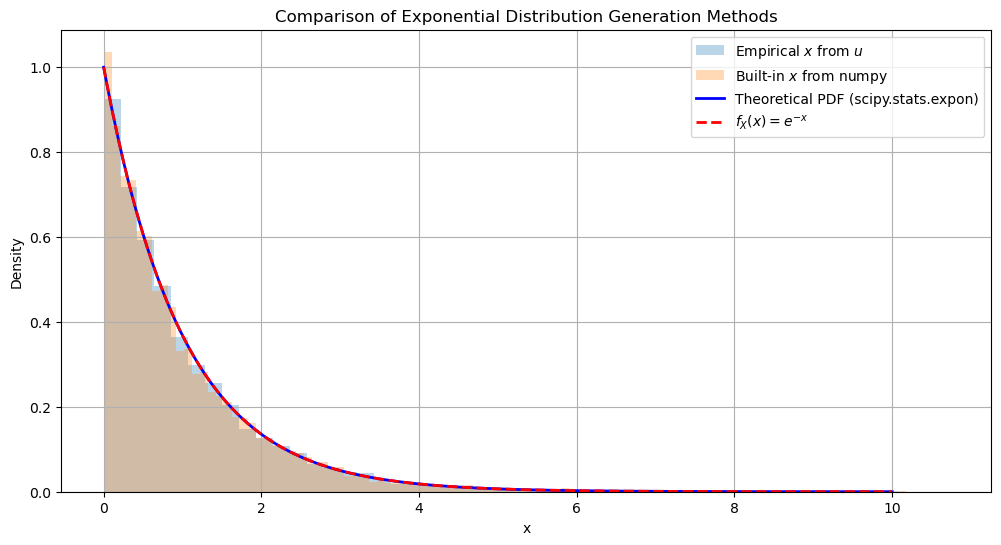

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Set the seed for reproducibility
np.random.seed(0)

# Number of samples to generate
n_samples = 10000

# Method 1: Generate from uniform distribution and transform using inverse CDF
u = np.random.uniform(0, 1, n_samples)
x_empirical = -np.log(1 - u)

# Method 2: Using built-in exponential distribution generator
x_builtin = np.random.exponential(scale=1.0, size=n_samples)

# Plot the histograms
plt.figure(figsize=(12, 6))

# Histogram of empirical x
plt.hist(x_empirical, bins=50, density=True, alpha=0.3, label='Empirical $x$ from $u$')

# Histogram of built-in x
plt.hist(x_builtin, bins=100, density=True, alpha=0.3, label='Built-in $x$ from numpy')


# Generate the x values
x_vals = np.linspace(0, 10, 1000)

# Theoretical PDF using scipy
pdf_scipy = expon.pdf(x_vals)

# Theoretical PDF using the expression p_x(x) = e^{-x}
pdf_expr = np.exp(-x_vals)

# Plot the scipy.stats.expon PDF
plt.plot(x_vals, pdf_scipy, 'b-', lw=2, label='Theoretical PDF (scipy.stats.expon)')

# Plot the PDF using the expression p_x(x) = e^{-x}
plt.plot(x_vals, pdf_expr, 'r--', lw=2, label='$f_{X}(x) = e^{-x}$')

# Labels and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Comparison of Exponential Distribution Generation Methods')
plt.legend()
plt.grid(True)
plt.show()


### Schonhoff's Method

In [2]:
import numpy as np

def exprv(num):
    """
    Generate exponentially distributed random variables.

    Parameters:
    num (int): Number of random variables to generate.

    Returns:
    numpy.ndarray: Array of exponentially distributed random variables.
    """
    # Set the random seed for reproducibility
    np.random.seed(0)
    
    # Generate uniformly distributed random variables in the range (0, 1)
    u = np.random.rand(num)
    
    # Transform to exponentially distributed random variables using -log(u)
    ex = -np.log(u)
    
    return ex

# Example usage
num = 5  # Number of random variables to generate
exponential_rvs = exprv(num)
print("Exponentially distributed random variables:", exponential_rvs)


Exponentially distributed random variables: [0.5999966  0.33520792 0.50623057 0.60718385 0.85883631]


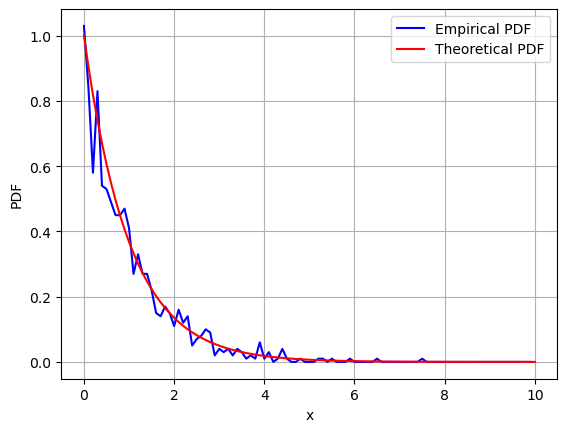

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ete(num):
    """
    Theoretical and Empirical PDFs of Exponentially distributed random numbers.

    Parameters:
    num (int): Number of random variables (RVs) to generate.

    Outputs:
    Displays the theoretical PDF and the empirical PDF.
    """
    # Generate uniformly distributed random variables
    u = np.random.rand(num)
    
    # Convert to exponentially distributed random variables
    z = -np.log(u)
    
    # Create a range for x values
    x = np.arange(0, 10.1, 0.1)
    
    # Compute the empirical PDF using histogram
    et, bin_edges = np.histogram(z, bins=x, density=False)
    
    # Normalize the empirical PDF
    n10 = num / 10
    nznorm = et / n10
    
    # Plot the empirical PDF
    plt.plot(bin_edges[:-1], nznorm, 'b', label='Empirical PDF')
    
    # Compute and plot the theoretical PDF
    y = np.exp(-x)
    plt.plot(x, y, 'r', label='Theoretical PDF')
    
    # Add labels, grid, and legend
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.grid(True)
    plt.legend()
    
    # Display the plot
    plt.show()

# Example usage
ete(1000)  # Generate and plot the PDFs using 1000 random variables


### References
- *T. Schonhoff and A. Giordano*, **Detection and Estimation Theory and its Applications**. Prentice Hall, 2006.